<a href="https://colab.research.google.com/github/AleksanderVEriksen/My_Projects/blob/main/ADV_ML_Weather_Forecasting_LSTM_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports and obtaining dataset 

In [5]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00514/Bias_correction_ucl.csv')

# Inspecting the dataset

In [7]:
print(df.shape)
df

(7752, 25)


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,2013-06-30,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.000000,0.000000,0.000000,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2
1,2.0,2013-06-30,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.000000,0.000000,0.000000,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5
2,3.0,2013-06-30,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.000000,0.000000,0.000000,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9
3,4.0,2013-06-30,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.000000,0.000000,0.000000,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3
4,5.0,2013-06-30,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.000000,0.000000,0.000000,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,2017-08-30,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,...,0.000000,0.000000,0.000000,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1
7748,24.0,2017-08-30,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,...,0.000000,0.000000,0.000000,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8
7749,25.0,2017-08-30,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,...,0.000000,0.000000,0.000000,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4
7750,NaN,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,...,0.000000,0.000000,0.000000,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3


In [8]:
# Check for NaN values
df.isnull().values.any()

True

In [9]:
# Drops NaN and reset index
df = df.dropna()
df = df.reset_index(drop=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [11]:
df._get_numeric_data().columns

Index(['station', 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin', 'LDAPS_RHmax',
       'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS', 'LDAPS_LH',
       'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1',
       'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 'lat', 'lon', 'DEM', 'Slope',
       'Solar radiation', 'Next_Tmax', 'Next_Tmin'],
      dtype='object')

In [12]:
df.select_dtypes(include = ["object"]).columns

Index(['Date'], dtype='object')

# Encode the dataset

In [13]:
from sklearn.preprocessing import OneHotEncoder
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7588 non-null   float64
 1   Date              7588 non-null   object 
 2   Present_Tmax      7588 non-null   float64
 3   Present_Tmin      7588 non-null   float64
 4   LDAPS_RHmin       7588 non-null   float64
 5   LDAPS_RHmax       7588 non-null   float64
 6   LDAPS_Tmax_lapse  7588 non-null   float64
 7   LDAPS_Tmin_lapse  7588 non-null   float64
 8   LDAPS_WS          7588 non-null   float64
 9   LDAPS_LH          7588 non-null   float64
 10  LDAPS_CC1         7588 non-null   float64
 11  LDAPS_CC2         7588 non-null   float64
 12  LDAPS_CC3         7588 non-null   float64
 13  LDAPS_CC4         7588 non-null   float64
 14  LDAPS_PPT1        7588 non-null   float64
 15  LDAPS_PPT2        7588 non-null   float64
 16  LDAPS_PPT3        7588 non-null   float64


In [14]:
df_encoded = df.copy()

In [15]:
# Drops prediction from LDAPS
df_encoded = df_encoded.drop(['Date','LDAPS_RHmin', 'LDAPS_RHmax', 'LDAPS_Tmin_lapse', 'LDAPS_Tmax_lapse', 'LDAPS_WS', 'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4', 'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4'], axis=1)

In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7588 entries, 0 to 7587
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   station          7588 non-null   float64
 1   Present_Tmax     7588 non-null   float64
 2   Present_Tmin     7588 non-null   float64
 3   lat              7588 non-null   float64
 4   lon              7588 non-null   float64
 5   DEM              7588 non-null   float64
 6   Slope            7588 non-null   float64
 7   Solar radiation  7588 non-null   float64
 8   Next_Tmax        7588 non-null   float64
 9   Next_Tmin        7588 non-null   float64
dtypes: float64(10)
memory usage: 592.9 KB


In [17]:
df_encoded.head(5)

,station,Present_Tmax,Present_Tmin,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,28.7,21.4,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,31.9,21.6,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,31.6,23.3,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,32.0,23.4,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,31.4,21.9,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [18]:
print(df_encoded['station'].unique())

[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25.]


In [19]:
df_station_1 = df_encoded[df_encoded['station'] == 1]
df_station_1 = df_station_1.reset_index(drop=True)

In [20]:
df_station_1.head

<bound method NDFrame.head of      station  Present_Tmax  Present_Tmin      lat      lon      DEM  Slope  \
0        1.0          28.7          21.4  37.6046  126.991  212.335  2.785   
1        1.0          28.3          21.2  37.6046  126.991  212.335  2.785   
2        1.0          24.4          20.6  37.6046  126.991  212.335  2.785   
3        1.0          27.9          17.9  37.6046  126.991  212.335  2.785   
4        1.0          24.9          21.5  37.6046  126.991  212.335  2.785   
..       ...           ...           ...      ...      ...      ...    ...   
298      1.0          25.2          18.1  37.6046  126.991  212.335  2.785   
299      1.0          23.2          17.7  37.6046  126.991  212.335  2.785   
300      1.0          23.2          16.0  37.6046  126.991  212.335  2.785   
301      1.0          20.3          15.7  37.6046  126.991  212.335  2.785   
302      1.0          20.0          15.1  37.6046  126.991  212.335  2.785   

     Solar radiation  Next_Tmax  

# Plotting the data based on date

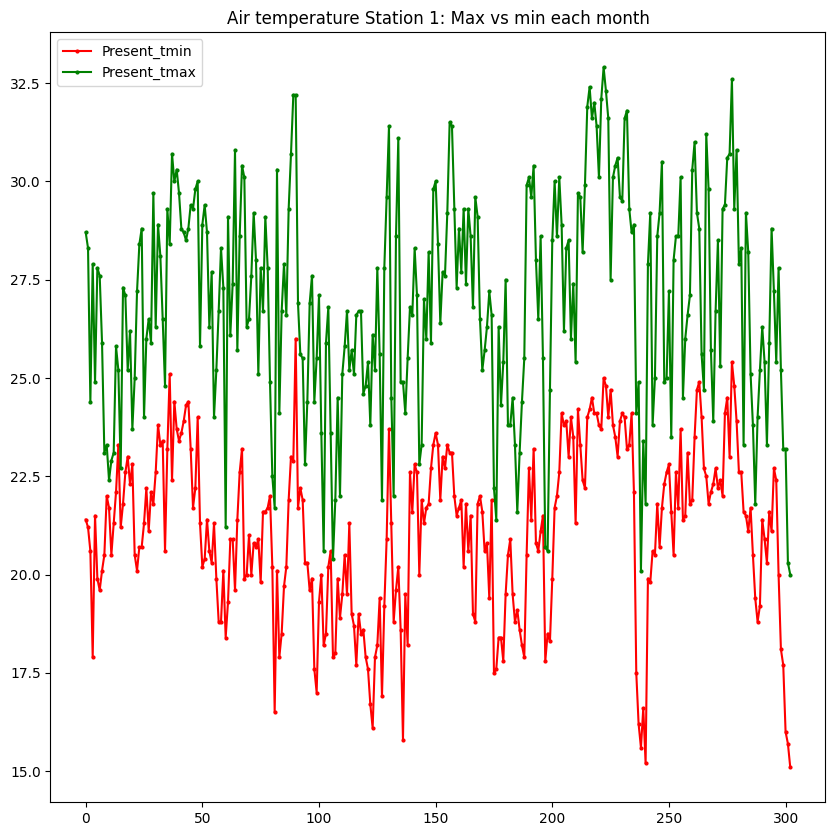

In [21]:
plt.figure(figsize=(10,10))
x = np.arange(0, len(df_station_1))
plt.plot(x,  df_station_1.Present_Tmin, marker = 'o'  , markersize = 2 ,color = 'red', label = 'Present_tmin')
plt.plot(x,  df_station_1.Present_Tmax, marker = 'o'  , markersize = 2, color = 'green', label = 'Present_tmax')

plt.legend(loc='best')
plt.title('Air temperature Station 1: Max vs min each month')
plt.show()

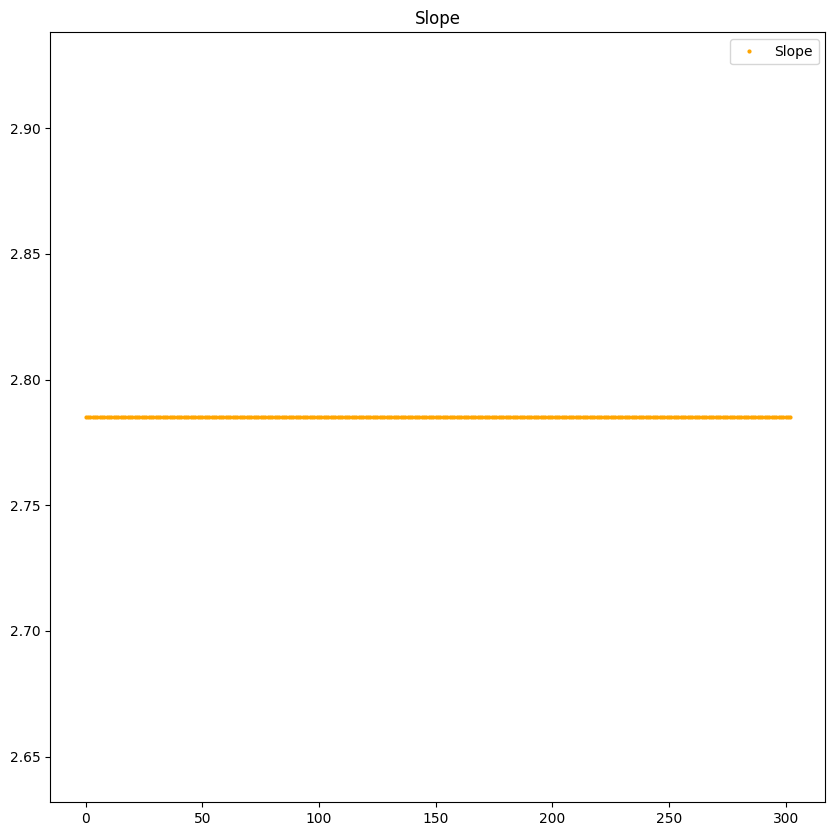

In [22]:
plt.figure(figsize=(10,10))
plt.plot(x,  df_station_1.Slope, marker = 'o' , linestyle = 'none' , markersize = 2 ,color = 'orange', label = 'Slope')

plt.legend(loc='best')
plt.title('Slope')
plt.show()

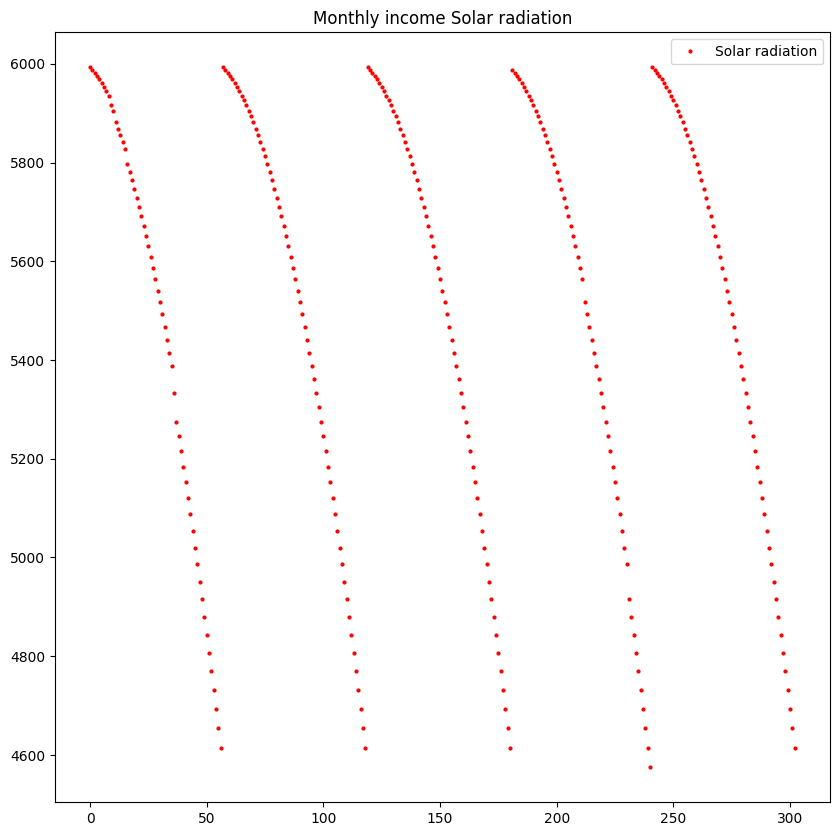

In [23]:
plt.figure(figsize=(10,10))
plt.plot(x,  df_station_1['Solar radiation'], marker = 'o' , linestyle = 'none' , markersize = 2 ,color = 'red', label = 'Solar radiation')

plt.legend(loc='best')
plt.title('Monthly income Solar radiation')
plt.show()

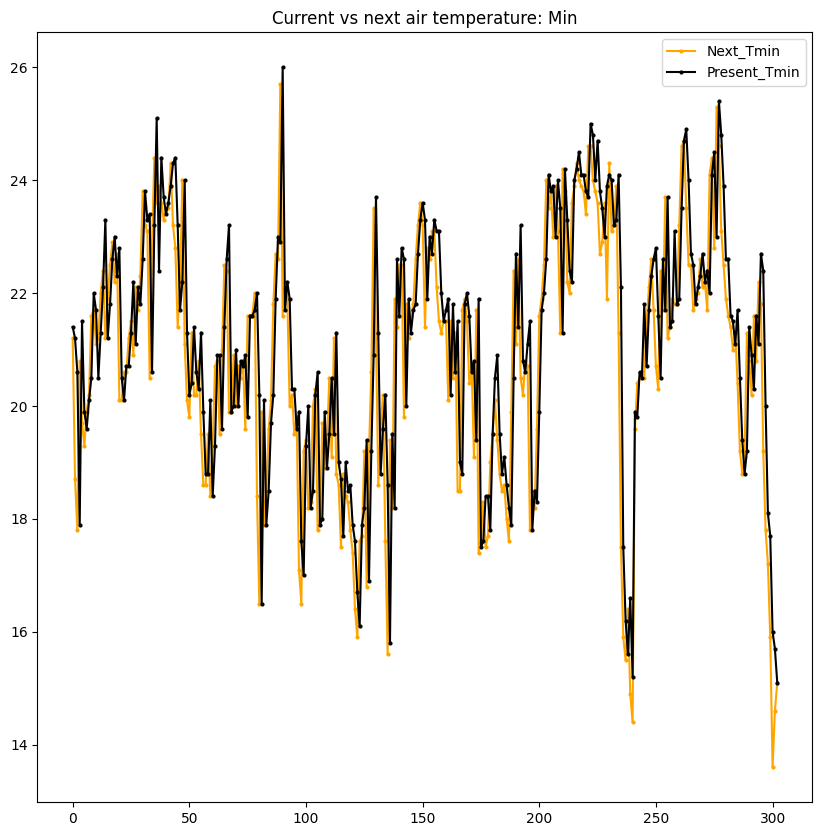

In [24]:
plt.figure(figsize=(10,10))
plt.plot(x,  df_station_1.Next_Tmin, marker = 'o'  , markersize = 2 ,color = 'orange', label = 'Next_Tmin')
plt.plot(x,  df_station_1.Present_Tmin, marker = 'o'  , markersize = 2, color = 'black', label = 'Present_Tmin')

plt.legend(loc='best')
plt.title('Current vs next air temperature: Min')
plt.show()

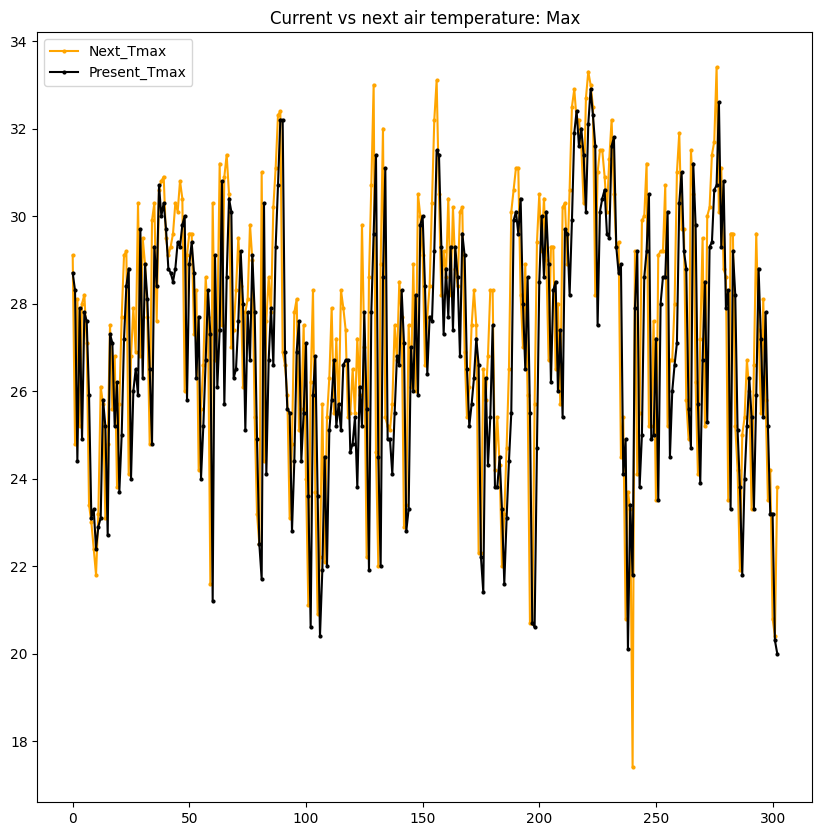

In [25]:
plt.figure(figsize=(10,10))
plt.plot(x,  df_station_1.Next_Tmax, marker = 'o'  , markersize = 2 ,color = 'orange', label = 'Next_Tmax')
plt.plot(x,  df_station_1.Present_Tmax, marker = 'o'  , markersize = 2, color = 'black', label = 'Present_Tmax')

plt.legend(loc='best')
plt.title('Current vs next air temperature: Max')
plt.show()

# Transform data from 2D tensor to 3D tensor

In [26]:
df_station_1_drop = df_station_1.drop(['station'], axis=1)
df_station_1_drop.head(10)

,Present_Tmax,Present_Tmin,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,37.6046,126.991,212.335,2.785,5992.895996,29.1,21.2
1,28.3,21.2,37.6046,126.991,212.335,2.785,5987.718750,24.8,18.7
2,24.4,20.6,37.6046,126.991,212.335,2.785,5981.979492,28.1,17.8
3,27.9,17.9,37.6046,126.991,212.335,2.785,5975.676270,25.2,20.8
4,24.9,21.5,37.6046,126.991,212.335,2.785,5968.809082,28.0,19.7
5,27.8,19.9,37.6046,126.991,212.335,2.785,5961.377441,28.2,19.3
6,27.6,19.6,37.6046,126.991,212.335,2.785,5953.376953,27.1,19.9
7,25.9,20.1,37.6046,126.991,212.335,2.785,5944.778809,23.4,20.2
8,23.1,20.5,37.6046,126.991,212.335,2.785,5935.615234,23.0,21.6
9,23.3,22.0,37.6046,126.991,212.335,2.785,5915.583496,22.4,21.7


In [27]:
X0 = []
X1 = []
X2 = []
X3 = []
X4 = []
X5 = []
X6 = []
X7 = []
X8 = []

y1 = []
y2 = []

ts = 1

df_encoded = df_station_1_drop

# Divide each feature in timesteps
for i in range(0, df_encoded.shape[0]-ts):
  X0.append(df_encoded.iloc[i:i + ts, 0])
  X1.append(df_encoded.iloc[i:i + ts, 1])
  X2.append(df_encoded.iloc[i:i + ts, 2])
  X3.append(df_encoded.iloc[i:i + ts, 3])
  X4.append(df_encoded.iloc[i:i + ts, 4])
  X5.append(df_encoded.iloc[i:i + ts, 5])
  X6.append(df_encoded.iloc[i:i + ts, 6])


  y1.append(df_encoded.iloc[i, 7])
  y2.append(df_encoded.iloc[i, 8])


In [28]:
X0,X1,X2,X3,X4,X5,X6,y1,y2 = np.array(X0), np.array(X1), np.array(X2), np.array(X3), np.array(X4), np.array(X5), np.array(X6), np.array(y1), np.array(y2)

In [29]:
y1 = y1.reshape(len(y1),1)
y2 = y2.reshape(len(y2),1)

In [30]:
y1.shape
# source for the convertion: https://www.youtube.com/watch?v=Ng_uGKcWfIo

(302, 1)

# Preprocessing the data

In [31]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()
X0 = scaler.fit_transform(X0)
X1 = scaler.fit_transform(X1)
X2 = scaler.fit_transform(X2)
X3 = scaler.fit_transform(X3)
X4 = scaler.fit_transform(X4)
X5 = scaler.fit_transform(X5)
X6 = scaler.fit_transform(X6)

scalery1 = MinMaxScaler()
scalery2 = MinMaxScaler()

y1 = scalery1.fit_transform(y1)
y2 = scalery2.fit_transform(y2)

In [32]:
X_1 = np.stack([X0,X2,X3,X4,X5,X6], axis=2)
X_2 = np.stack([X1,X2,X3,X4,X5,X6], axis=2)
X_1.shape, X_2.shape , y1.shape, y2.shape

((302, 1, 6), (302, 1, 6), (302, 1), (302, 1))

In [33]:
y1[0]

array([0.73125])

# Train test split

In [34]:
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X_1, y1, test_size=0.33, shuffle = False)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_2, y2, test_size=0.33, shuffle = False)

In [35]:
X_train1.shape, y_train1.shape, X_train2.shape, y_train2.shape

((202, 1, 6), (202, 1), (202, 1, 6), (202, 1))

# Creating the models

In [36]:
def LSTM_Model(X,Y,bs,ep, shape1, shape2):
  model = keras.Sequential()
  model.add(keras.layers.LSTM(64, input_shape =(shape1, shape2), return_sequences = True))
  model.add(keras.layers.LSTM(32, input_shape =(shape1, shape2), return_sequences = False))
  model.add(keras.layers.Dense(10))
  model.add(keras.layers.Dense(1))

  print(model.summary())

  loss = keras.losses.MeanAbsoluteError()
  opt = keras.optimizers.Adam(learning_rate = 0.001)
  met = ['accuracy']

  model.compile(optimizer = opt, loss = loss, metrics = met)

  History = model.fit(x = X, 
            y=Y,
            batch_size=bs,
            epochs=ep
            )

  return model, History

# Training the models

In [37]:
# Variable def
batch_size = 16
epochs = 100

In [38]:
# Model one for max_temp prediction
model_lstm_max = LSTM_Model(X_train1, y_train1, batch_size, epochs, X_train1.shape[1], X_train1.shape[2])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 1, 64)             18176     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 30,933
Trainable params: 30,933
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
13/13 [==============================] - 5s 5ms/step - loss: 0.5646 - accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 5ms/step - loss: 0.4

In [39]:
# Model two for min_temp prediction
model_lstm_min = LSTM_Model(X_train2, y_train2, batch_size, epochs, X_train1.shape[1], X_train1.shape[2])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 64)             18176     
                                                                 
 lstm_3 (LSTM)               (None, 32)                12416     
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 30,933
Trainable params: 30,933
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
13/13 [==============================] - 4s 5ms/step - loss: 0.5107 - accuracy: 0.0000e+00
Epoch 2/100
13/13 [==============================] - 0s 4ms/step - loss: 0

# Loss and training value of models

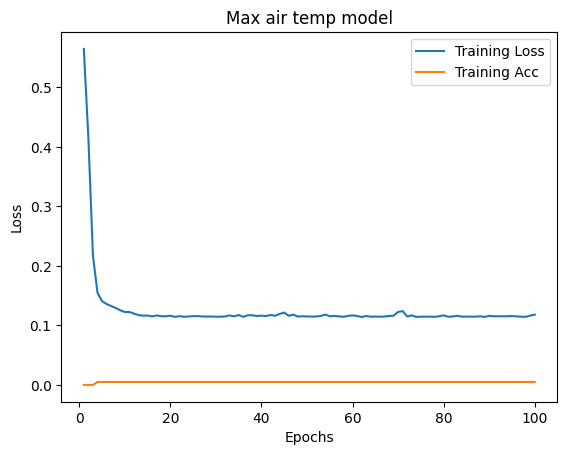

In [55]:
loss_values1 = model_lstm_max[1].history['loss']
loss_values2 = model_lstm_min[1].history['loss']

acc_values1 = model_lstm_max[1].history['accuracy']
acc_values2 = model_lstm_min[1].history['accuracy']

epochs = range(1, len(loss_values1)+1)

plt.plot(epochs, loss_values1, label='Training Loss')
plt.plot(epochs, acc_values2, label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Max air temp model')
plt.legend()

plt.show()

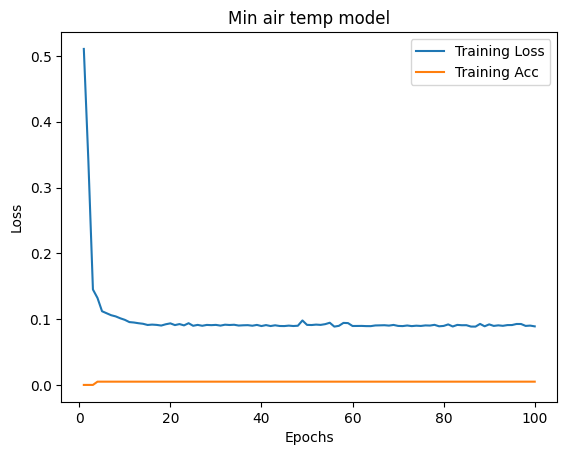

In [56]:
epochs = range(1, len(loss_values2)+1)

plt.plot(epochs, loss_values2, label='Training Loss')
plt.plot(epochs, acc_values2, label='Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Min air temp model')
plt.legend()

plt.show()

# Evaluation

In [51]:
model_lstm_max[0].evaluate(X_test1, y_test1)
model_lstm_min[0].evaluate(X_test2, y_test2)

4/4 [==============================] - 0s 4ms/step - loss: 0.0852 - accuracy: 0.0100


[0.08520442992448807, 0.009999999776482582]

In [52]:
pred_y1_max = model_lstm_max[0].predict(X_test1)
pred_y2_min = model_lstm_min[0].predict(X_test2)

4/4 [==============================] - 0s 3ms/step


In [43]:
y_test1[0], y_test2[0]

(array([0.8125]), array([0.73553719]))

In [44]:
pred_y1_inverse_max = scalery1.inverse_transform(pred_y1_max)
y_test1_inverse = scalery1.inverse_transform(y_test1)

pred_y2_inverse_min = scalery2.inverse_transform(pred_y2_min)
y_test2_inverse = scalery2.inverse_transform(y_test2)

In [45]:
from sklearn.metrics import mean_squared_error 


mse_1 = mean_squared_error(y_test1_inverse, pred_y1_inverse_max, squared = False)
mse_2 = mean_squared_error(y_test2_inverse, pred_y2_inverse_min, squared = False)

print("Max rmse: " + mse_1.astype(str) + '\n' + "Min rmse: " + mse_2.astype(str))

Max rmse: 2.571995320575293
Min rmse: 1.3325661175204753


In [46]:
from sklearn.metrics import r2_score

r2_max = r2_score(y_test1_inverse, pred_y1_inverse_max)
r2_min = r2_score(y_test2_inverse, pred_y2_inverse_min)

print("Max r2 score: " + r2_max.astype(str) + '\n' + "Min r2 score: " + r2_min.astype(str))

Max r2 score: 0.39661964405148376
Min r2 score: 0.7215194317193885


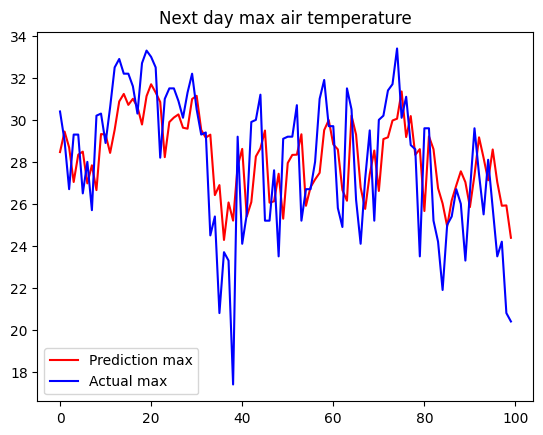

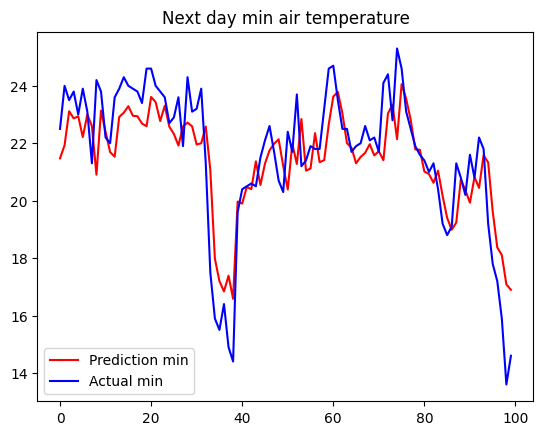

In [47]:
x = np.arange(0, len(y_test1))
xx = np.arange(0, len(y_train1))

plt.plot(x, pred_y1_inverse_max, color = 'r', label = 'Prediction max')
plt.plot(x, y_test1_inverse, color = 'b', label = 'Actual max')
plt.legend(loc ='best')
plt.title('Next day max air temperature')
plt.show()

plt.plot(x, pred_y2_inverse_min, color = 'r', label = 'Prediction min')
plt.plot(x, y_test2_inverse, color = 'b', label = 'Actual min')
plt.legend(loc ='best')
plt.title('Next day min air temperature')
plt.show()

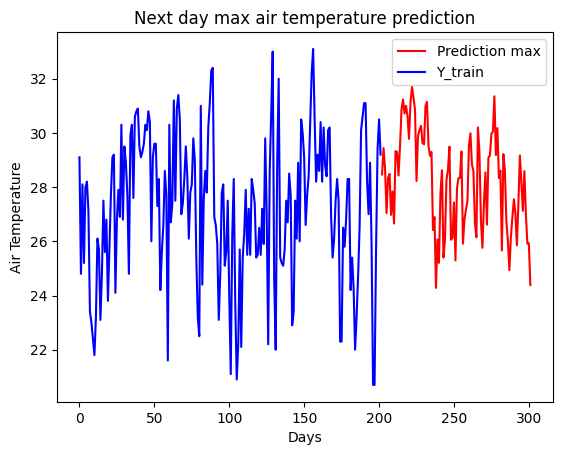

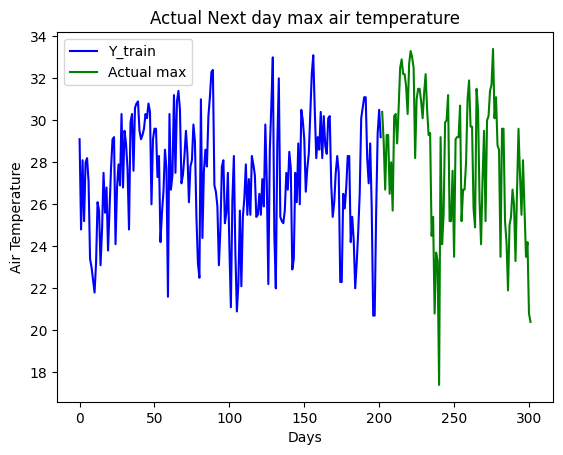

In [48]:
x = np.arange(len(xx), len(xx)+len(y_test1))


plt.plot(x, pred_y1_inverse_max, color = 'r', label = 'Prediction max')
plt.plot(xx, scalery1.inverse_transform(y_train1), color = 'b', label = 'Y_train')
plt.legend(loc ='best')
plt.xlabel('Days')
plt.ylabel('Air Temperature')
plt.title('Next day max air temperature prediction')
plt.show()

plt.plot(xx, scalery1.inverse_transform(y_train1), color = 'b', label = 'Y_train')
plt.plot(x, y_test1_inverse, color = 'g', label = 'Actual max')
plt.legend(loc ='best')
plt.xlabel('Days')
plt.ylabel('Air Temperature')
plt.title('Actual Next day max air temperature')
plt.show()

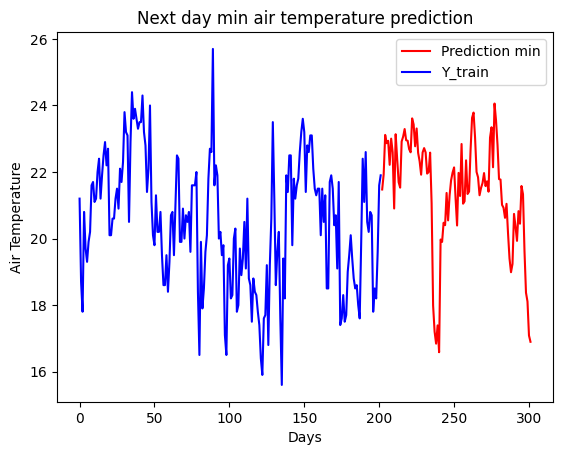

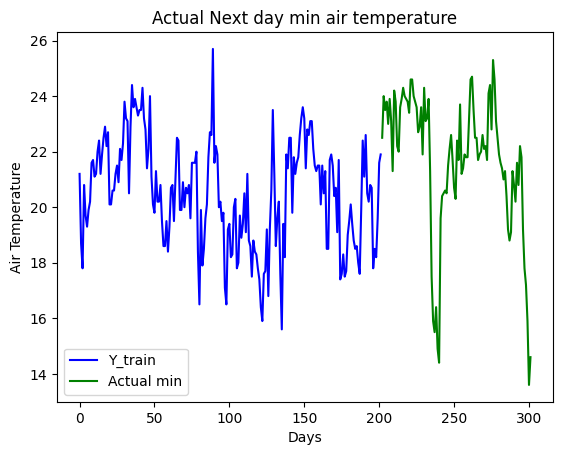

In [49]:
x = np.arange(len(xx), len(xx)+len(y_test2))

plt.plot(x, pred_y2_inverse_min, color = 'r', label = 'Prediction min')
plt.plot(xx, scalery2.inverse_transform(y_train2), color = 'b', label = 'Y_train')
plt.legend(loc ='best')
plt.xlabel('Days')
plt.ylabel('Air Temperature')
plt.title('Next day min air temperature prediction')
plt.show()

plt.plot(xx, scalery2.inverse_transform(y_train2), color = 'b', label = 'Y_train')
plt.plot(x, y_test2_inverse, color = 'g', label = 'Actual min')
plt.legend(loc ='best')
plt.xlabel('Days')
plt.ylabel('Air Temperature')
plt.title('Actual Next day min air temperature')
plt.show()

In [50]:
df_station_1_drop

,Present_Tmax,Present_Tmin,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,28.7,21.4,37.6046,126.991,212.335,2.785,5992.895996,29.1,21.2
1,28.3,21.2,37.6046,126.991,212.335,2.785,5987.718750,24.8,18.7
2,24.4,20.6,37.6046,126.991,212.335,2.785,5981.979492,28.1,17.8
3,27.9,17.9,37.6046,126.991,212.335,2.785,5975.676270,25.2,20.8
4,24.9,21.5,37.6046,126.991,212.335,2.785,5968.809082,28.0,19.7
...,...,...,...,...,...,...,...,...,...
298,25.2,18.1,37.6046,126.991,212.335,2.785,4769.281738,23.5,17.2
299,23.2,17.7,37.6046,126.991,212.335,2.785,4731.345215,24.2,15.9
300,23.2,16.0,37.6046,126.991,212.335,2.785,4692.945313,20.8,13.6
301,20.3,15.7,37.6046,126.991,212.335,2.785,4654.086426,20.4,14.6
